In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.table import Table

In [2]:
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300

In [3]:
master_table_fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_StelVelDisp._Mvir.fits'
master_table = Table.read(master_table_fn, format='fits')

In [4]:
ell_mvir = master_table[master_table['Mvir'] > 0]

In [5]:
Mvir = ell_mvir['Mvir']
Mstar = np.log10(ell_mvir['nsa_sersic_mass'])
bins=np.histogram(np.hstack((Mvir,Mstar)), bins=10)[1]

In [6]:
plot_dir = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/Ellipticals_Images/results_plots/'

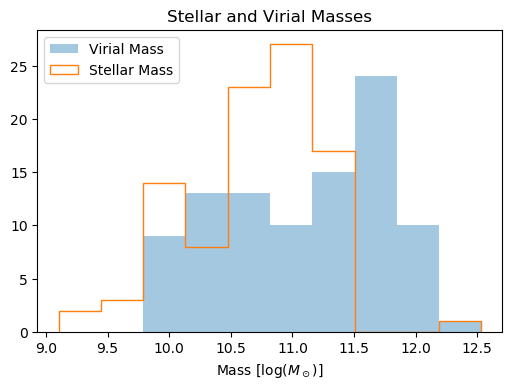

In [87]:
plt.hist(Mvir, label='Virial Mass', histtype='stepfilled', alpha=0.4, bins=bins)
plt.hist(Mstar, label='Stellar Mass', histtype='step', bins=bins)
plt.xlabel('Mass [$\log(M_\odot)$]')
plt.legend(loc='upper left')
plt.title('Stellar and Virial Masses')
plt.savefig(plot_dir + 'mass_distributions.png')
plt.show()

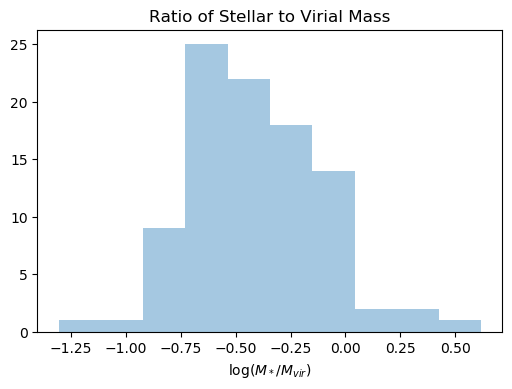

In [8]:
plt.hist(Mstar - Mvir, histtype='stepfilled', alpha=0.4)
plt.xlabel('log($M_*/M_{vir}$)')
plt.title('Ratio of Stellar to Virial Mass')
plt.savefig(plot_dir + 'mass_ratios.png')
plt.show()

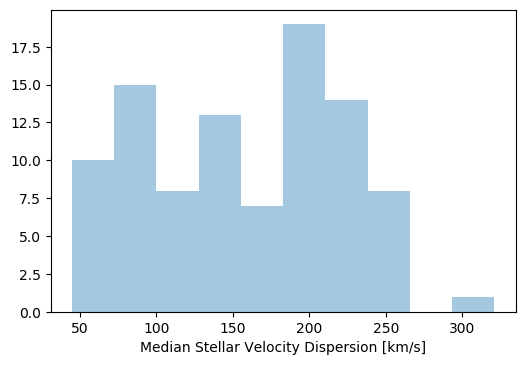

In [9]:
plt.hist(ell_mvir['star_sigma'], histtype='stepfilled', alpha=0.4, bins=10)
plt.xlabel('Median Stellar Velocity Dispersion [km/s]')
plt.savefig(plot_dir + 'median_sigma.png')
plt.show()

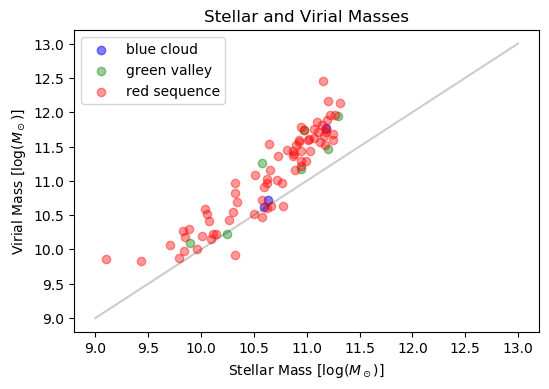

In [86]:
plt.scatter(Mstar[cmd == 1], Mvir[cmd == 1], color = 'b', alpha=0.5, label='blue cloud')
plt.scatter(Mstar[cmd == 2], Mvir[cmd == 2], alpha=0.4, color = 'g', label='green valley')
plt.scatter(Mstar[cmd == 3], Mvir[cmd == 3], alpha=0.4, color = 'r', label='red sequence')
plt.legend()
plt.ylabel('Virial Mass [$\log (M_\odot)$]')
plt.xlabel('Stellar Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.title('Stellar and Virial Masses')
plt.savefig(plot_dir + 'mass_scatter.png')
plt.show()

In [43]:
r_band = np.zeros(len(ell_mvir))
for i in range(len(ell_mvir)):
    r_band[i] = ell_mvir['nsa_elpetro_absmag'][i][4]

In [45]:
cmd = ell_mvir['CMD_class']

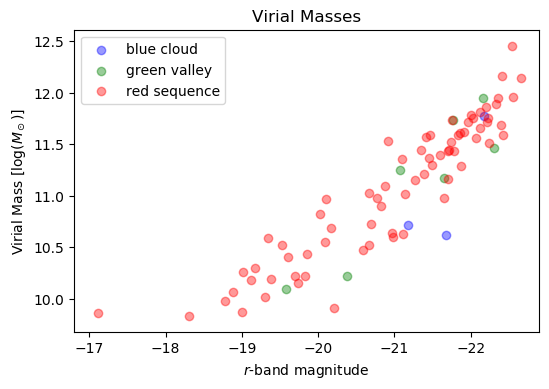

In [85]:
plt.scatter(r_band[cmd == 1], Mvir[cmd == 1], color='b', alpha=0.4, label='blue cloud')
plt.scatter(r_band[cmd == 2], Mvir[cmd == 2], color='g', alpha=0.4, label='green valley')
plt.scatter(r_band[cmd == 3], Mvir[cmd == 3], color='r', alpha=0.4, label='red sequence')
plt.legend()
plt.xlabel('$r$-band magnitude')
plt.ylabel('Virial Mass [$\log(M_\odot)$]')
plt.title('Virial Masses')
plt.xlim(-16.8,-22.9)
plt.savefig(plot_dir + 'mag_mvir.png')

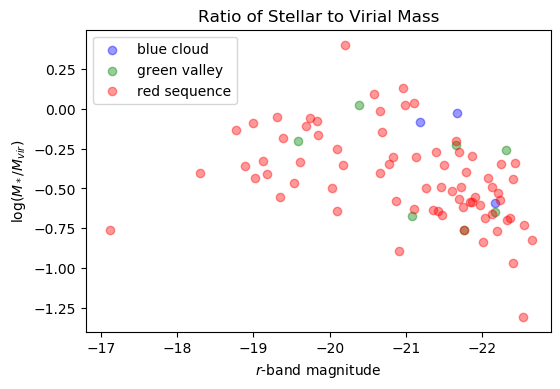

In [84]:
plt.scatter(r_band[cmd == 1], Mstar[cmd == 1] - Mvir[cmd == 1], alpha=0.4, color='b', label='blue cloud')
plt.scatter(r_band[cmd == 2], Mstar[cmd == 2] - Mvir[cmd == 2], alpha=0.4, color='g', label='green valley')
plt.scatter(r_band[cmd == 3], Mstar[cmd == 3] - Mvir[cmd == 3], alpha=0.4, color='r', label='red sequence')
plt.legend()
plt.xlim(-16.8,-22.9)
plt.xlabel('$r$-band magnitude')
plt.title('Ratio of Stellar to Virial Mass')
plt.ylabel('$\log(M_*/M_{vir})$')
plt.savefig(plot_dir + 'mag_mratio.png')